In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
d = 0.5 # mm
dd = 0.01 # mm

# Messwerte Versuch 1
exp1 = pd.DataFrame({
    "n":  [1, 2, 3, 4, 5, 6],
    "l":  [52, 52, 52, 52,  36, 36 ],
    "U":  [1.53, 1.45, 0.99, 1.00, 0.23, 0.3 ],
    "I":  [0.52, 1.2, 0.6, 1.6, 0.88, 1.15],
})
exp1["dl"] = 0.5

# digital: 0.5% + 1, analog: 1.5% 
exp1["dU"] = (exp1["U"] * 0.005 + 0.001) \
    .where(cond = exp1['n']%2==1, other = exp1["U"] * 0.015)

# digital: 1.5% + 1, analog: 2.5%                      
exp1["dI"] = (exp1["I"] * 0.015 + 0.001) \
    .where(cond = exp1['n']%2==0, other = exp1["I"] * 0.02)

exp1["R"] = exp1["U"] / exp1["I"]
exp1["dR"] = ((exp1["dU"]/exp1["I"])**2 + (exp1["U"]/exp1["I"]**2 * exp1["dI"])**2).pow(0.5)

# exp1["Rprol"] = exp1["R"] / exp1["l"]
# exp1["dRprol"] = ((exp1["dR"]/exp1["l"])**2 + (exp1["R"]/exp1["l"]**2 * exp1["dl"])**2).pow(0.5)

exp1["rho"] = exp1["U"] * math.pi * (d/2)**2 / (exp1["I"] * exp1["l"]) * 1e-4 # Ohm×m

exp1["drhoU"] = exp1["dU"] * math.pi * (d/2)**2 / (exp1["I"]    * exp1["l"])    * 1e-4
exp1["drhoI"] = exp1["U"]  * math.pi * (d/2)**2 / (exp1["I"]**2 * exp1["l"])    * 1e-4 * exp1["dI"]
exp1["drhol"] = exp1["U"]  * math.pi * (d/2)**2 / (exp1["I"]    * exp1["l"]**2) * 1e-4 * exp1["dl"]
exp1["drhod"] = exp1["U"]  * math.pi * (d/2)    / (exp1["I"]    * exp1["l"])    * 1e-4 * dd * 2
exp1["drho"] = (exp1["drhoU"]**2 + exp1["drhoI"]**2 + exp1["drhol"]**2 + exp1["drhod"]**2)**0.5
#exp1["drho2"] = np.sum(np.square(np.array([drhoU + drhoI, drhol, drhod])))**0.5

    
exp1

,n,l,U,I,dl,dU,dI,R,dR,rho,drhoU,drhoI,drhol,drhod,drho
0,1,52,1.53,0.52,0.5,0.00865,0.01040,2.942308,0.061152,1.111001e-06,6.281152e-09,2.222003e-08,1.068271e-08,8.888012e-08,9.244987e-08
1,2,52,1.45,1.20,0.5,0.02175,0.01900,1.208333,0.026354,4.562610e-07,6.843914e-09,7.224132e-09,4.387125e-09,3.650088e-08,3.808659e-08
2,3,52,0.99,0.60,0.5,0.00595,0.01200,1.650000,0.034458,6.230322e-07,3.744486e-09,1.246064e-08,5.990694e-09,4.984258e-08,5.186000e-08
3,4,52,1.00,1.60,0.5,0.01500,0.02500,0.625000,0.013537,2.359970e-07,3.539956e-09,3.687454e-09,2.269202e-09,1.887976e-08,1.969069e-08
4,5,36,0.23,0.88,0.5,0.00215,0.01760,0.261364,0.005770,1.425517e-07,1.332549e-09,2.851035e-09,1.979885e-09,1.140414e-08,1.199493e-08
5,6,36,0.30,1.15,0.5,0.00450,0.01825,0.260870,0.005697,1.422823e-07,2.134234e-09,2.257958e-09,1.976143e-09,1.138258e-08,1.196335e-08


In [3]:
with open("table1.tex","w") as f:
    f.write('''
\\begingroup
\\sisetup{round-mode=uncertainty,round-precision=2}
\\begin{tabular}{rSSSS}
\\toprule
{n} & {$l$ (\\unit{\\cm})} & {$U$ (\\unit{\\V})} & {$I$ (\\unit{\\A})} & {$\\varrho$ (\\unit{\\micro\\ohm\\m})} \\\\
\\midrule
''')
    for index, row in exp1.iterrows():
        f.write(f"{int(row['n'])} & ")
        f.write(f"{row['l']}\\pm{row['dl']} & ")
        f.write(f"{row['U']}\\pm{row['dU']} & ")
        f.write(f"{row['I']}\\pm{row['dI']} & ")
        f.write(f"{row['rho']*1e6}\\pm{row['drho']*1e6} ")
        f.write(" \\\\\n")
        
    f.write('''
\\bottomrule
\\end{tabular}
\\endgroup
''')


In [4]:
# Auswahl: Schaltung 5

e = exp1.iloc[4]

rho = e["rho"] * 1e6
drhoU = e["drhoU"] * 1e6
drhoI = e["drhoI"] * 1e6
drhol = e["drhol"] * 1e6
drhod = e["drhod"] * 1e6
drho = e["drho"] * 1e6

tab3 = pd.DataFrame({
    r"$\varrho$ ($\mathrm{\mu\Omega m}$)": [rho],
    r"$|\frac{\partial \varrho}{\partial U}|\Delta U$": [drhoU],
    r"$|\frac{\partial \varrho}{\partial I}|\Delta I$": [drhoI],
    r"$|\frac{\partial \varrho}{\partial l}|\Delta l$": [drhol],
    r"$|\frac{\partial \varrho}{\partial d}|\Delta d$": [drhod],
    r"$\Delta \varrho$": [drho],
#   r"$\Delta \rho'$": [drho2],
})
tab3.style.format(precision=4).hide(axis='index') \
    .to_latex(buf = f"table3.tex", hrules = True, siunitx=True)
tab3

,$\varrho$ ($\mathrm{\mu\Omega m}$),$|\frac{\partial \varrho}{\partial U}|\Delta U$,$|\frac{\partial \varrho}{\partial I}|\Delta I$,$|\frac{\partial \varrho}{\partial l}|\Delta l$,$|\frac{\partial \varrho}{\partial d}|\Delta d$,$\Delta \varrho$
0,0.142552,0.001333,0.002851,0.00198,0.011404,0.011995


In [5]:
# rho_lit = 0.124 # µ Ohm m, https://www.spektrum.de/lexikon/physik/tantal/14319 (ohne Angabe der Temperatur)
rho_lit = 0.131 # µ Ohm m, Wikipedia 

t = abs(rho-rho_lit)/drho

t

0.963052397284084

In [6]:
# Messwerte Versuch 2

exp2 = pd.DataFrame({
    "l":  [44.5, 39.5, 35.0, 31.5, 28.5, 25.5, 23.0, 20.5, 16.5, 14.5, 12.3, 16.5 ],
    "U":  [0.33, 0.296, 0.264, 0.239, 0.206, 0.192, 0.187, 0.169, 0.152, 0.115, 0.097, 0.128],
})

# Rechnung
exp2["dl"] = 0.5
exp2["dU"] = exp2["U"] * 0.005 + 0.001 # 0.5% + 1
I = 1.0
dI = I * 0.02 # 2%

exp2["R"] = exp2["U"] / I
exp2["dR"] = ((exp2["dU"]/I)**2 + (exp2["U"]/I*dI)**2).pow(0.5)

exp2["rho"] = exp2["U"] * math.pi * (d/2)**2 / (I * exp2["l"]) * 1e-4 # Ohm×m

exp2["drhoU"] = exp2["dU"] * math.pi * (d/2)**2 / (I    * exp2["l"])    * 1e-4
exp2["drhoI"] = exp2["U"]  * math.pi * (d/2)**2 / (I**2 * exp2["l"])    * 1e-4 * dI
exp2["drhol"] = exp2["U"]  * math.pi * (d/2)**2 / (I    * exp2["l"]**2) * 1e-4 * exp2["dl"]
exp2["drhod"] = exp2["U"]  * math.pi * (d/2)    / (I    * exp2["l"])    * 1e-4 * dd * 2
exp2["drho"] = (exp2["drhoU"]**2 + exp2["drhoI"]**2 + exp2["drhol"]**2 + exp2["drhod"]**2)**0.5


exp2

,l,U,dl,dU,R,dR,rho,drhoU,drhoI,drhol,drhod,drho
0,44.5,0.330,0.5,0.002650,0.330,0.007112,1.456075e-07,1.169273e-09,2.912150e-09,1.636040e-09,1.164860e-08,1.217433e-08
1,39.5,0.296,0.5,0.002480,0.296,0.006418,1.471379e-07,1.232777e-09,2.942758e-09,1.862505e-09,1.177103e-08,1.233717e-08
2,35.0,0.264,0.5,0.002320,0.264,0.005767,1.481037e-07,1.301517e-09,2.962073e-09,2.115766e-09,1.184829e-08,1.246300e-08
3,31.5,0.239,0.5,0.002195,0.239,0.005260,1.489763e-07,1.368213e-09,2.979526e-09,2.364703e-09,1.191811e-08,1.258502e-08
4,28.5,0.206,0.5,0.002030,0.206,0.004593,1.419228e-07,1.398560e-09,2.838457e-09,2.489874e-09,1.135383e-08,1.204664e-08
5,25.5,0.192,0.5,0.001960,0.192,0.004311,1.478397e-07,1.509196e-09,2.956793e-09,2.898817e-09,1.182717e-08,1.262163e-08
6,23.0,0.187,0.5,0.001935,0.187,0.004211,1.596407e-07,1.651897e-09,3.192814e-09,3.470450e-09,1.277126e-08,1.371393e-08
7,20.5,0.169,0.5,0.001845,0.169,0.003851,1.618686e-07,1.767146e-09,3.237373e-09,3.948016e-09,1.294949e-08,1.403138e-08
8,16.5,0.152,0.5,0.001760,0.152,0.003513,1.808796e-07,2.094395e-09,3.617592e-09,5.481199e-09,1.447037e-08,1.602837e-08
9,14.5,0.115,0.5,0.001575,0.115,0.002788,1.557255e-07,2.132762e-09,3.114510e-09,5.369845e-09,1.245804e-08,1.408144e-08


In [7]:
# Bestimmung \varrho aus exp2

rho2 = (exp2["rho"]/exp2["drho"]**2).sum() / (1/exp2["drho"]**2).sum() * 1e6
drho2 = 1 / (1/exp2["drho"]**2).sum()**0.5  * 1e6
t2 = abs(rho2-rho_lit)/drho2

(rho2, drho2, t2)

(0.1523276225109303, 0.0038114093354376655, 5.595731298821839)

In [8]:
with open("table2.tex","w") as f:
    f.write('''
\\begingroup
\\sisetup{round-mode=uncertainty,round-precision=2}
\\begin{tabular}{SSS}
\\toprule
{$l$ (\\unit{\\cm})} & {$U$ (\\unit{\\V})} & {$\\varrho$ (\\unit{\\micro\\ohm\\m})} \\\\
\\midrule
''')
    for index, row in exp2.iterrows():
        f.write(f"{row['l']}\\pm{row['dl']} & ")
        f.write(f"{row['U']}\\pm{row['dU']} & ")
        f.write(f"{row['rho']*1e6}\\pm{row['drho']*1e6} ")
        f.write(" \\\\\n")
        
    f.write('''
\\bottomrule
\\end{tabular}
\\endgroup
''')


In [9]:
# Lineare Regression
# Quelle: https://home.uni-leipzig.de/prakphys/pdf/LA_EP1_Einf%C3%BChrung_WS2014_2.pdf

x = exp2["l"]
y = exp2["R"]

n = len(x)
xs  = 1/n * x.sum()
x2s = 1/n * x.pow(2).sum()
ys  = 1/n * y.sum()
xys = 1/n *(x*y).sum()

a1 = (x2s*ys - xs*xys)/(x2s - xs**2)
b1 = (xys - xs*ys)/(x2s - xs**2)
s = (1/(n-2) * (y - (a1 + b1*x)).pow(2).sum())**0.5
da1 = s * (x2s / (n *(x2s - xs**2)))**0.5
db1 = s * (1 / (n *(x2s - xs**2)))**0.5

pd.DataFrame({
    r"$a$ ($\Omega$)": [a1],
    r"$b$ ($\frac{\Omega}{\mathrm{cm}}$)": [b1],
    r"$\Delta a$": [da1],
    r"$\Delta b$": [db1]})

,$a$ ($\Omega$),$b$ ($\frac{\Omega}{\mathrm{cm}}$),$\Delta a$,$\Delta b$
0,0.018876,0.00698,0.00678,0.000247


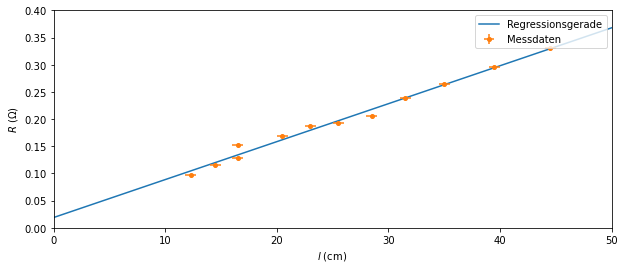

In [10]:
plt.figure(figsize=(10, 4))
plt.ylim(0, 0.4)
plt.xlim(0, 50)
#plt.margins(x=0, y =0)
plt.xlabel(r'$l$ ($\mathrm{cm}$)')
plt.ylabel(r'$R$ ($\Omega$)')
plt.plot([0,50],[a1, a1+50*b1], label=f'Regressionsgerade')
plt.errorbar(exp2["l"], exp2["R"], exp2["dU"], exp2["dl"], label='Messdaten', marker = "o", ms=4, ls='none')
#plt.errorbar(df["m"], df["s"], 0.01, 0, label='Fehlerbalken', ms=4, ls='none')
plt.legend(loc='upper right')
plt.savefig(f"plot1.pdf")
plt.show()

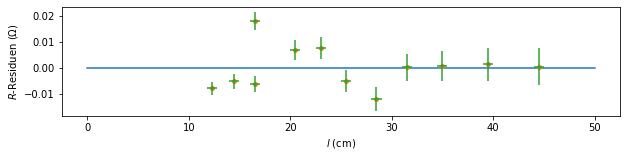

In [11]:
plt.figure(figsize=(10, 2))
#plt.margins(x=0, y =0)
plt.xlabel(r'$l$ (cm)')
plt.ylabel(r'$R$-Residuen ($\Omega$)')
plt.plot([0,50],[0, 0], label=f'Regressionsgerade')
plt.plot(exp2["l"], exp2["R"] - (a1+exp2["l"]*b1), label='Residuen', marker = "o", ms=4, ls='none')
plt.errorbar(exp2["l"], exp2["R"] - (a1+exp2["l"]*b1), exp2["dR"], exp2["dl"], label='Fehlerbalken', ms=4, ls='none')
#plt.legend(loc='upper right')
plt.savefig(f"plot1residuen.pdf")
plt.show()

In [29]:
# Temperaturberechnung

dens = 16.65 # g / cm³
wkap = 140.0 # J / kgK


incr = (exp2.iloc[-1]["rho"] / exp2.iloc[0]["rho"] - 1) * 100
incrT = incr/0.5
power = exp2.iloc[0]["U"] * I
vol = exp2.iloc[0]["l"] * math.pi * (d/2 * 0.1) **2 # cm³
mass = dens * vol # g
time = (wkap * (mass * 1e-3) * incrT) / power
time

5.690154619563137

In [30]:
# Exporting all locals

outfile = open("defs.tex", "w")
outfile.write(r"""
\newcommand{\DefVal}[2]{%
  \expandafter\newcommand\csname val-#1\endcsname{#2}%
}
\newcommand{\Val}[1]{\csname val-#1\endcsname}
""")
for (n, x) in locals().items():
    if type(x) in [float, np.float64]:
        outfile.write(f"\\DefVal{{{n}}}{{{np.format_float_positional(x, trim='-')}}}\n")
outfile.close()
#print(open("defs.tex").read())